In [1]:
#트리 모형의 criterion(엔트로피와 지니)
#동전 던지기
from math import log2, ceil
#확률 50%
p = 0.5
#이벤트 정보 계산
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h)) #1bit로 표현 가능

확률: 0.5
정보량: 1.0 1


In [2]:
#확률이 10%라면?
import math
p = 0.1
#이벤트 정보 계산
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h)) #4bit가 필요함

확률: 0.1
정보량: 3.321928094887362 4


In [3]:
#주사위 던지기
from math import log2
p = 1/6
#이벤트 정보 계산
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h)) #3bit가 필요함

확률: 0.16666666666666666
정보량: 2.584962500721156 3


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, 'Information')

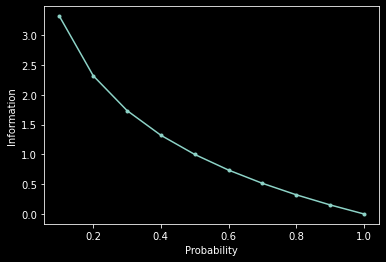

In [4]:
#확률과 엔트로피
import numpy as np
from math import log2
from matplotlib import pyplot as plt

#확률
probs = np.arange(0.1,1.1,0.1) #range 0.1~1.0, step 0.1 
print(probs)
#정보량 계산
info = [-log2(p) for p in probs]

plt.plot(probs, info, marker='.')
plt.xlabel('Probability')
plt.ylabel('Information')
#확률이 높을수록 정보량은 감소하고 확률이 낮을수록 정보량은 증가한다.

In [ ]:
#랜덤 변수에 대한 정보를 계산하는 것을 '정보 엔트로피' 또는 '엔트로피'라고 함
#각 사건의 확률에 대한 로그에 각 사건의 확률을 곱한 값의 합계의 음수 ..???

In [5]:
#주사위 던지기의 엔트로피 계산
from math import log2
#경우의 수 
n = 6
#확률 
p = 1.0/n
#엔트로피 공식
entropy = -sum([p*log2(p) for _ in range(n)])

print(entropy) #비트

2.584962500721156


In [6]:
print(log2(2)) #2에 거듭제곱을 해서 2가 되는 수는 1
print(log2(4)) #2에 거듭제곱을 해서 4가 되는 수는 2
#print(log2(0)) #2에 거듭제곱을 해서 0이 되는 수는 없음

1.0
2.0


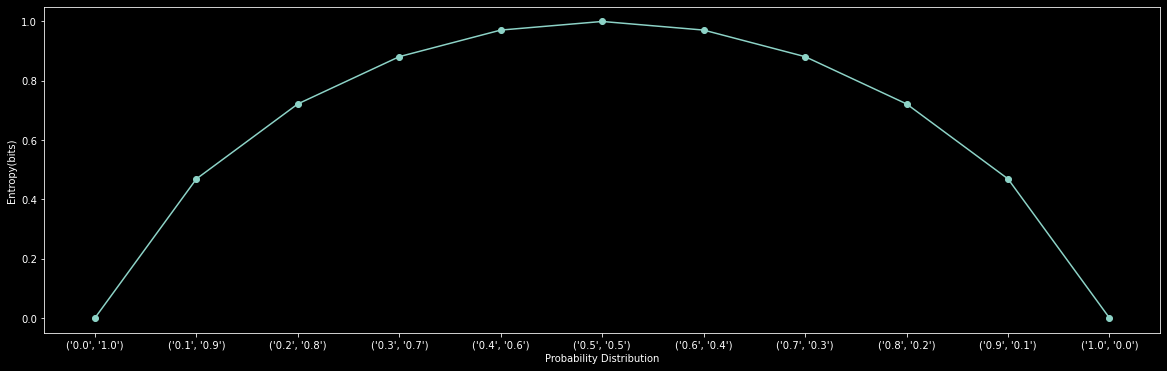

In [7]:
#엔트로피는 0.0~1.0 사이의 값
#1개 클래스만 구성되어 있으면(100% 순도) 0,2개 클래스가 같은 비율(50:50)로 섞여 있으면 1.0
from math import log2
import matplotlib.pyplot as plt

def entropy(events):
    #1e-15 : 로그 계산에 오류가 발생하지 않도록 임의로 더해 주는 매우 작은 숫자값
    return -sum([p*log2(p + 1e-15) for p in events])

#확률
probs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#확률 분포
dists = [[p,1-p] for p in probs]
#각 분포에 대한 엔트로피 계산
ents = [entropy(d) for d in dists]
#확률분포와 엔트로피 그래프
plt.figure(figsize=(20,6))
plt.plot(probs,ents,marker='o')
xnum=[]
for d in dists:
    dd = (str(d[0]),'{:.1f}'.format(d[1]))
    xnum.append(dd)
plt.xticks(probs,xnum)
plt.xlabel('Probability Distribution') #확률 분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()

In [ ]:
#지니 계수 : 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표(0 ~ 0.5)
#100% 순수한 노드로 구성되어 있으면 0
#클래스별로 균등하게 분포되어 있으면(50:50) 0.5
#로그를 계산할 필요가 없어서 엔트로피보다 구현 성능이 좀 더 우수함

In [8]:
import numpy as np

a = np.array([1,3,6])
b = np.array([2,4,6])

#a의 각 원소에서 b의 각 원소를 뺀 행렬
diff = np.subtract.outer(a,b)
# 1-2 1-4 1-6
# 3-2 3-4 3-6
# 6-2 6-4 6-6
print(diff)

[[-1 -3 -5]
 [ 1 -1 -3]
 [ 4  2  0]]


In [9]:
def gini(x):
    #평균 절대 오차
    mad = np.abs(np.subtract.outer(x,x)).mean()
    #평균 절대 오차를 평균으로 나누고
    rmad = mad/np.mean(x)
    #0.5를 곱하여 리턴
    g = 0.5 * rmad
    return g 

In [10]:
v = [0,1,0,1] #2개 클래스가 균등하게 섞여 있으면 지니 계수는 0.5
print(gini(v))

v = [1,1,1,1] #1개 클래스만으로 100% 구성되어 있으면 지니 계수는 0
print(gini(v))

v = [1,0,1,1]
print(gini(v))

0.5
0.0
0.25


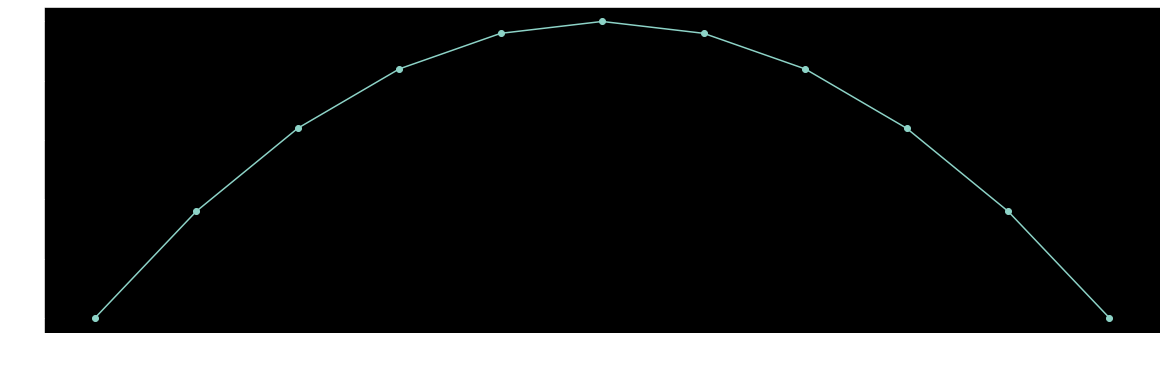

In [11]:
#지니계수는 0.0 ~ 0.5 사이의 값
#1개 클래스만 구성되어 있으면(100% 순도) 0, 2개 클래스가 같은 비율(50:50)로 섞여 있으면 0.5
%matplotlib inline
from math import log2
from matplotlib import pyplot

def gini2(events):
    return sum([p*(1-p) for p in events])

#확률
probs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#확률 분포
dists = [[p, 1-p] for p in probs]
#각 분포에 대한 지니계수 계산
ents = [gini2(d) for d in dists]
#확률분포와 지니계수 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum = []
for d in dists:
    dd = (str(d[0]),'{:.1f}'.format(d[1]))
    xnum.append(dd)
plt.xticks(probs,xnum)
plt.xlabel('Probability Distribution') #확률 분포
plt.ylabel('Gini') #지니계수
plt.show()